In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
data_meta = pd.read_csv('pdb_data_no_dups.csv/pdb_data_no_dups.csv')
data_seq = pd.read_csv('pdb_data_seq.csv/pdb_data_seq.csv')

# EDA

In [16]:
data_seq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467304 entries, 0 to 467303
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   structureId        467304 non-null  object
 1   chainId            467294 non-null  object
 2   sequence           467276 non-null  object
 3   residueCount       467304 non-null  int64 
 4   macromoleculeType  432487 non-null  object
dtypes: int64(1), object(4)
memory usage: 17.8+ MB


In [18]:
data_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141401 entries, 0 to 141400
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   structureId               141401 non-null  object 
 1   classification            141399 non-null  object 
 2   experimentalTechnique     141401 non-null  object 
 3   macromoleculeType         137636 non-null  object 
 4   residueCount              141401 non-null  int64  
 5   resolution                128589 non-null  float64
 6   structureMolecularWeight  141401 non-null  float64
 7   crystallizationMethod     96242 non-null   object 
 8   crystallizationTempK      97039 non-null   float64
 9   densityMatthews           124724 non-null  float64
 10  densityPercentSol         124749 non-null  float64
 11  pdbxDetails               118534 non-null  object 
 12  phValue                   105110 non-null  float64
 13  publicationYear           117602 non-null  f

In [60]:
data_meta.head()

,structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear
0,100D,DNA-RNA HYBRID,X-RAY DIFFRACTION,DNA/RNA Hybrid,20,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0
1,101D,DNA,X-RAY DIFFRACTION,DNA,24,2.25,7939.35,NaN,NaN,2.00,38.45,NaN,NaN,1995.0
2,101M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18112.80,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0
3,102D,DNA,X-RAY DIFFRACTION,DNA,24,2.20,7637.17,"VAPOR DIFFUSION, SITTING DROP",277.0,2.28,46.06,"pH 7.00, VAPOR DIFFUSION, SITTING DROP, temper...",7.0,1995.0
4,102L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,165,1.74,18926.61,NaN,NaN,2.75,55.28,NaN,NaN,1993.0


In [61]:
data_seq.head()

,structureId,chainId,sequence,residueCount,macromoleculeType
0,100D,A,CCGGCGCCGG,20,DNA/RNA Hybrid
1,100D,B,CCGGCGCCGG,20,DNA/RNA Hybrid
2,101D,A,CGCGAATTCGCG,24,DNA
3,101D,B,CGCGAATTCGCG,24,DNA
4,101M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein


In [57]:
X_meta = data_meta[['structureId','classification','macromoleculeType','structureMolecularWeight']]
#Only Keeping the rows belonging to Protein macromoleculeType
X_meta = X_meta.loc[X_meta['macromoleculeType']=='Protein']

In [73]:
X_seq = data_seq[['structureId','sequence','macromoleculeType']]
X_seq = X_seq.loc[X_seq['macromoleculeType']=='Protein']

In [92]:
#Merging the two dfs
final_df = X_seq.merge(X_meta,on='structureId')

In [93]:
final_df.head()
final_df.drop(['macromoleculeType_x','macromoleculeType_y'],axis=1,inplace=True)

In [94]:
final_df.dropna()
#Only 4 rows

,structureId,sequence,classification,structureMolecularWeight
0,101M,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,OXYGEN TRANSPORT,18112.80
1,102L,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...,HYDROLASE(O-GLYCOSYL),18926.61
2,102M,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,OXYGEN TRANSPORT,18010.64
3,103L,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...,HYDROLASE(O-GLYCOSYL),19092.72
4,103M,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,OXYGEN TRANSPORT,18093.78
...,...,...,...,...
346320,9XIA,MNYQPTPEDRFTFGLWTVGWQGRDPFGDATRRALDPVESVQRLAEL...,ISOMERASE(INTRAMOLECULAR OXIDOREDUCTASE),43542.29
346321,9XIM,SVQATREDKFSFGLWTVGWQARDAFGDATRTALDPVEAVHKLAEIG...,ISOMERASE(INTRAMOLECULAR OXIDOREDUCTASE),174722.12
346322,9XIM,SVQATREDKFSFGLWTVGWQARDAFGDATRTALDPVEAVHKLAEIG...,ISOMERASE(INTRAMOLECULAR OXIDOREDUCTASE),174722.12
346323,9XIM,SVQATREDKFSFGLWTVGWQARDAFGDATRTALDPVEAVHKLAEIG...,ISOMERASE(INTRAMOLECULAR OXIDOREDUCTASE),174722.12


In [97]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 346325 entries, 0 to 346324
Data columns (total 4 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   structureId               346325 non-null  object 
 1   sequence                  346322 non-null  object 
 2   classification            346324 non-null  object 
 3   structureMolecularWeight  346325 non-null  float64
dtypes: float64(1), object(3)
memory usage: 13.2+ MB


## Using Encoding

In [186]:
X = final_df.copy()
X.pop('structureId')

0         101M
1         102L
2         102M
3         103L
4         103M
          ... 
346320    9XIA
346321    9XIM
346322    9XIM
346323    9XIM
346324    9XIM
Name: structureId, Length: 346325, dtype: object

In [188]:
print(X.shape)
X.dropna(inplace=True)

(346325, 3)


In [189]:
X.shape

(346321, 3)

In [190]:
y=X.pop('classification')

In [191]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

ct1 = ColumnTransformer([
    ('ordEnc',OrdinalEncoder(),[0]),
    ('pass','passthrough',[1])
])
ct2 = ColumnTransformer([
    ('scalar',StandardScaler(),[1]),
    ('pass','passthrough',[0])
])
pipe = Pipeline([
    ('ct1',ct1),('ct2',ct2)
])

In [ ]:
# Pipeline
pipe

In [192]:
transformed_data = pipe.fit_transform(X, y)

In [193]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(transformed_data, y, test_size=0.2, random_state=42)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

# Dummy Classifier

In [199]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = dummy_clf.predict(X_test)

# Calculate the accuracy of the DummyClassifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.13338627012199525


In [200]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


C:\Users\Varun\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Varun\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                                     precision    recall  f1-score   support

                                            5'-3' EXO/ENDO NUCLEASE       0.00      0.00      0.00         1
                                      ACETYLATION AND ACTIN-BINDING       0.00      0.00      0.00         1
                                      ACETYLCHOLINE BINDING PROTEIN       0.00      0.00      0.00        16
                                      ACETYLCHOLINE-BINDING PROTEIN       0.00      0.00      0.00        44
                                                  ACETYLTRANSFERASE       0.00      0.00      0.00         2
                                           ACID ANHYDRIDE HYDROLASE       0.00      0.00      0.00         1
                                                      ACTIN BINDING       0.00      0.00      0.00         1
                                              ACTIN BINDING PROTEIN       0.00      0.00      0.00         2
                  

C:\Users\Varun\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot: >

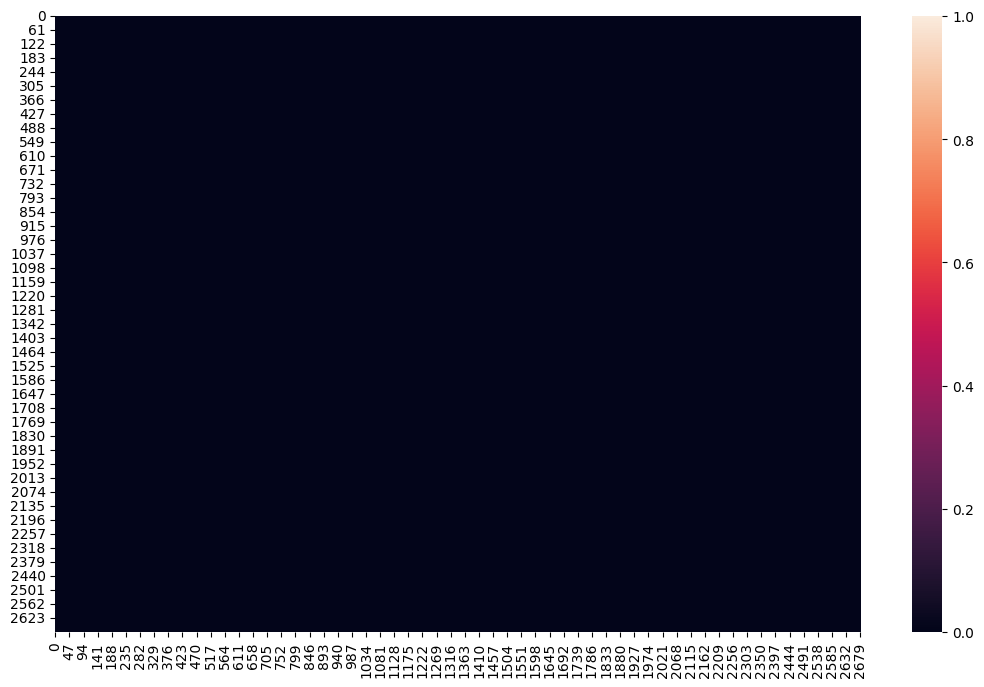

In [205]:
conf_mat = confusion_matrix(y_test, y_pred)

#Normalize confusion_matrix
conf_mat = conf_mat.astype('float')/ conf_mat.sum(axis=1)[:, np.newaxis]

# Plot Heat Map
fig, ax = plt.subplots(figsize=(13, 8))
fig.set_size_inches(13, 8)
sns.heatmap(conf_mat)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='saga',penalty='l2',max_iter=1000)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

# Calculate the accuracy of the DummyClassifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [208]:
?LogisticRegression